# **LEZIONE 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm, cauchy, chi2
import warnings

warnings.filterwarnings('ignore')

## **Exercise 01.1**
 **- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:**

 1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).


### **Computing statistical uncertainties: the blocking method**
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.
In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$

## SOLUZIONE
In questo esercizio, l'obbiettivo era quello di verificare il corretto funzionamento del generatore di numeri pseudocasuali che abbiamo poi utilizzato anche per i successivi esercizi. Il generatore è implementato attraverso l'utilizzo di una classe "Random" il cui metodo fondamentale è `Rannyu` che genera valori pseudo-casuali nell'intervallo [0,1)

Per calcolare i valori medi richiesti nell'esercizio di cui sopra, ho utilizzato il metodo della Media a Blocchi.
in particolare ho utilizzato:
* 100 Blocchi
* 10000 estrazioni per ciascun blocco

Nel primo estratto di codice ho calcolato il valor medio del valore richiesto ed il suo quadrato (necessario per il calcolo dell'errore) per ciascuno dei blocchi.

```cpp
double *r= new double [M]; for(int i=0; i<M; i++) r[i]= rnd.Rannyu();

for (int i = 0; i < N; ++i) { //itero sul numero dei blocchi
        double sum1 = 0;

        for (int j = 0; j < L; ++j) {
            int k = j + i * L; // # blocchi i* # elementi in ciascun blocco, e ci sommo j
            sum1 += r[k];            // Somma dei numeri casuali
        }

        ave[i] = sum1 / L;            // Media r_i, essendo che sommo su i che va da 0 a N-1 ottengo N valori, ovvero uno per ciascun numero dei blocchi
        av2[i] = (ave[i]) * (ave[i]); // faccio il quadrato dei valori medi di ciascun blocco
    }

In questo modo nel secondo estratto mostro come ho potuto utilizzare i valori già calcolati per produrre come risultato una media progressiva, con un errore decrescente secondo una legge di potenza: $$ \sigma \sim \frac{1}{\sqrt{N-1}}$$

Osservando il grafico ci si accorge di come poco dopo il 60-esimo blocco il valore calcolato risulta essere piuttosto preciso e compatibile con il valore atteso.

```cpp
for (int i = 0; i < N; ++i) { //itero sul numero dei blocchi

        for(int j=0; j < (i+1) ; j++){
            sum_prog[i] += ave[j];
            su2_prog[i] += av2[j];
        }

        sum_prog[i]= sum_prog[i] / (i+1); // media cumulativa per tutti i blocchi fino all'iesimo
        su2_prog[i]= su2_prog[i] / (i+1); // media cumulativa del quadrato delle medie sui primi i+1 blocchi (i+1 perchè il primo blocco ha indice 0)
        err_prog[i]= error(sum_prog[i], su2_prog[i], i);
        risultati << i + 1 << "," << (sum_prog[i]) << "," << su2_prog[i] << "," << err_prog[i] << "\n";
    }

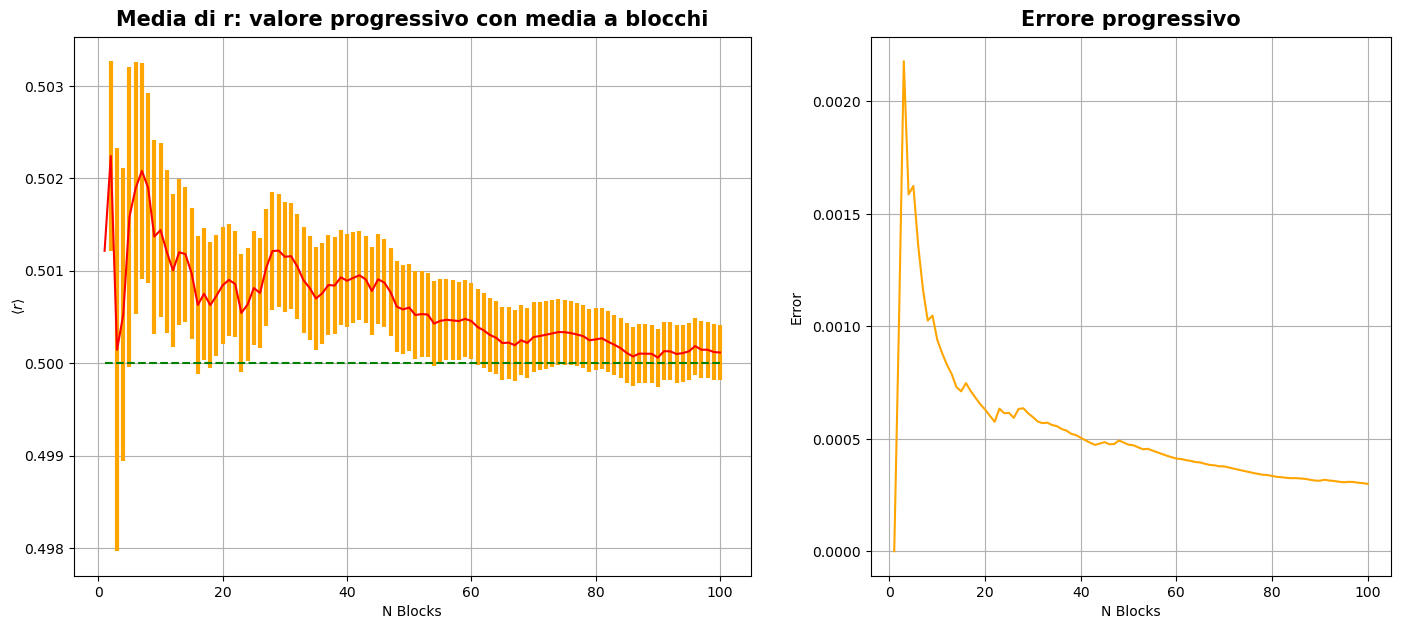

In [2]:
df11 = pd.read_csv("data/risultati_1_1_1.out")
df11
x = df11["Block"]
y = df11["prog_val"]
err = df11["error"]



fig, axs = plt.subplots(1, 2, figsize=(17, 7), gridspec_kw={'width_ratios': [1.3, 1]})


axs[0].errorbar(x, y, yerr=err, fmt='-', color='red', ecolor='orange', elinewidth=3)
zerocinque = np.full(df11.shape[0], 0.5)
axs[0].plot(x, zerocinque, linestyle='--', color='green')

axs[0].set_title('Media di r: valore progressivo con media a blocchi' ,fontweight='bold', fontsize=15,  pad=8)
axs[0].set_xlabel('N Blocks')
axs[0].set_ylabel(r'$\langle r \rangle $', labelpad=-2)
axs[0].grid(True)
axs[1].grid(True)
axs[1].plot(x, err, color='orange')
axs[1].set_title('Errore progressivo',  fontweight='bold', fontsize=15, pad=8)
axs[1].set_xlabel('N Blocks')
axs[1].set_ylabel('Error', labelpad=6)
plt.grid(True)
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

In maniera molto simile, utilizzando sempre lo stesso metodo ho anche calcolato l'andamento della varianza sullo stesso set di numeri pseudo casuali.
Anche qui è possibile notare come dopo pochi blocchi il valore della media progressiva ottenuto si stabilizzi attorno ad un valore molto vicino a quello atteso, e con un incertezza che ne evidenzia la compatibilità statistica. L'errore sul risultato decresce seguendo la power-law descritta nel metodo della media blocchi.

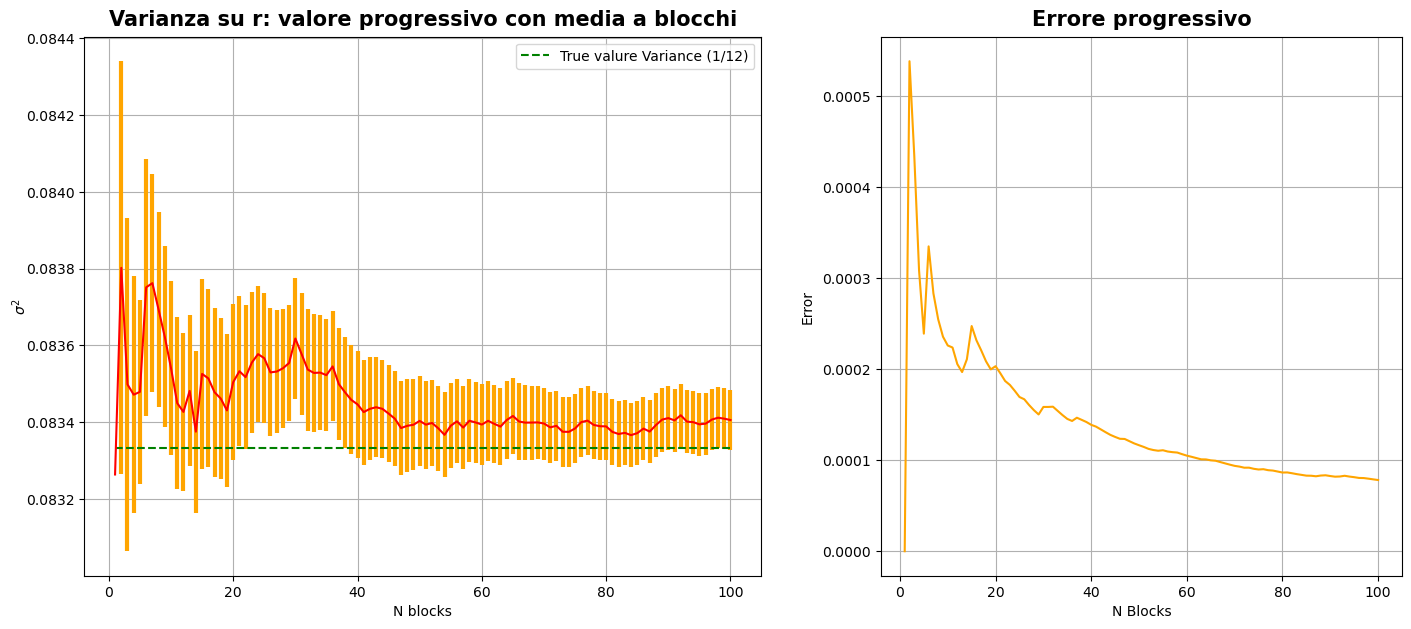

In [3]:
df12 = pd.read_csv("data/risultati_1_1_2.out")
df12
x = df12["Block"]
y = df12["prog_val"]
err = df12["error"]



fig, axs = plt.subplots(1, 2, figsize=(17, 7), gridspec_kw={'width_ratios': [1.3, 1]})


axs[0].errorbar(x, y, yerr=err, fmt='-', color='red', ecolor='orange', elinewidth=3)
zero = np.full(df11.shape[0], 1/12)
axs[0].plot(x, zero, linestyle='--', label ='True valure Variance (1/12)', color='green')

axs[0].set_title('Varianza su r: valore progressivo con media a blocchi' ,fontweight='bold', fontsize=15,  pad=8)
axs[0].set_xlabel('N blocks')
axs[0].set_ylabel(r'$\sigma^2$', labelpad=-2)
axs[0].grid(True)
axs[0].legend()
axs[1].grid(True)
axs[1].plot(x, err, color='orange')
axs[1].set_title('Errore progressivo',  fontweight='bold', fontsize=15, pad=8)
axs[1].set_xlabel('N Blocks')
axs[1].set_ylabel('Error', labelpad=6)

plt.grid(True)
plt.show()

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.


3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... but before judging, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

Il valor medio ottenuto sulle misure del chi_2 è =  99.66279999999999


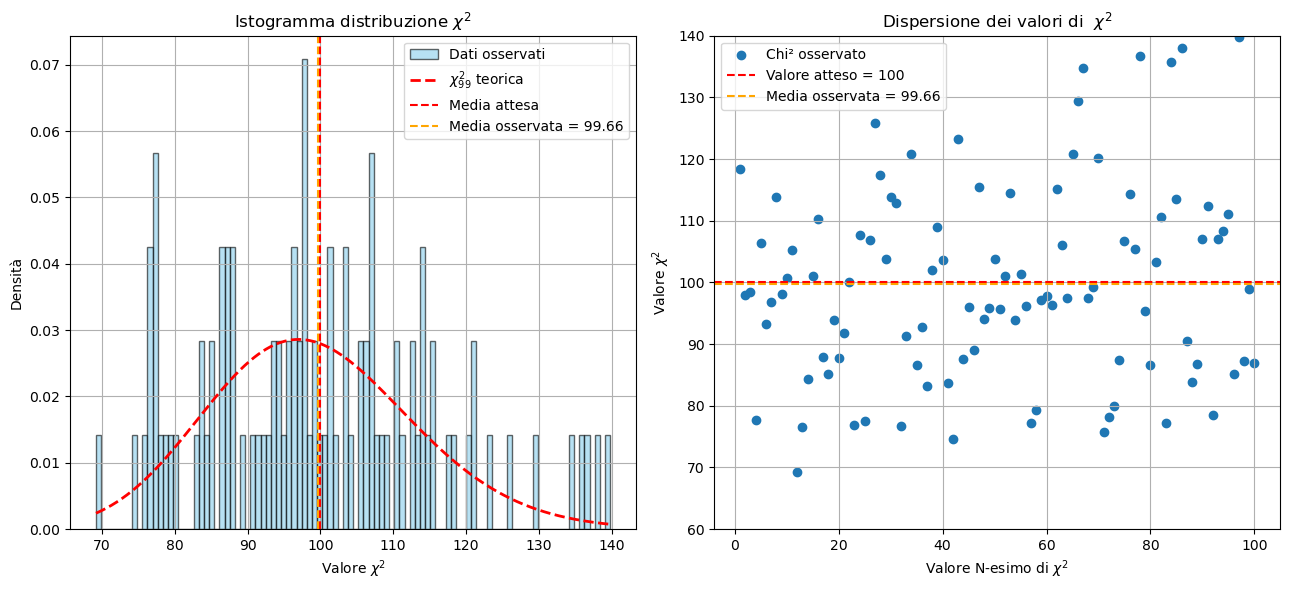

In [4]:
df = pd.read_csv("data/risultati_1_1_3.out")
x = df["N"]
y = df["Chi2_value"]

# Parametri
dof = 99
expected_mean = 100
observed_mean = y.mean()

print("Il valor medio ottenuto sulle misure del chi_2 è = ", observed_mean)

# Crea figura con due subplot affiancati
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

# --- Primo subplot: Istogramma ---
axs[0].hist(
    y,
    bins=100,
    density=True,
    color='skyblue',
    edgecolor='black',
    alpha=0.6,
    label='Dati osservati'
)

# Aggiunta fit teorico della distribuzione Chi²
x_fit = np.linspace(min(y), max(y), 1000)
pdf_fit = chi2.pdf(x_fit, df=dof)
axs[0].plot(x_fit, pdf_fit, 'r--', linewidth=2, label=f'$\chi^2_{{{dof}}}$ teorica')

# Media attesa e osservata
axs[0].axvline(expected_mean, color='red', linestyle='--', linewidth=1.5, label='Media attesa')
axs[0].axvline(observed_mean, color='orange', linestyle='--', linewidth=1.5, label=f'Media osservata = {observed_mean:.2f}')

axs[0].set_title("Istogramma distribuzione $\chi^2$")
axs[0].set_xlabel("Valore $\chi^2$")
axs[0].set_ylabel("Densità")
axs[0].grid(True)
axs[0].legend()

# --- Secondo subplot: Chi² per blocco ---
axs[1].scatter(x, y, marker='o', linestyle='-', label='Chi² osservato')
axs[1].axhline(y=expected_mean, color='red', linestyle='--', label='Valore atteso = 100')
axs[1].axhline(y=observed_mean, color='orange', linestyle='--', label=f'Media osservata = {observed_mean:.2f}')

axs[1].set_title("Dispersione dei valori di  $\chi^2$")
axs[1].set_xlabel(r"Valore N-esimo di $\chi^2$")
axs[1].set_ylabel("Valore $\chi^2$")
axs[1].set_ylim(60, 140)
axs[1].grid(True)
axs[1].legend()

# Layout ordinato
plt.tight_layout()
plt.show()

Sulla sinistra mostro i valori ottenuti per il $\chi^2$ accumulati nei bin dell'istogramma, i singoli valori sono calcolati mediando su 10000 estrazioni. Nello scatterplot di destra sono mostrati i primi 100 valori ottenuti, in funzione dell'ordine di calcolo.

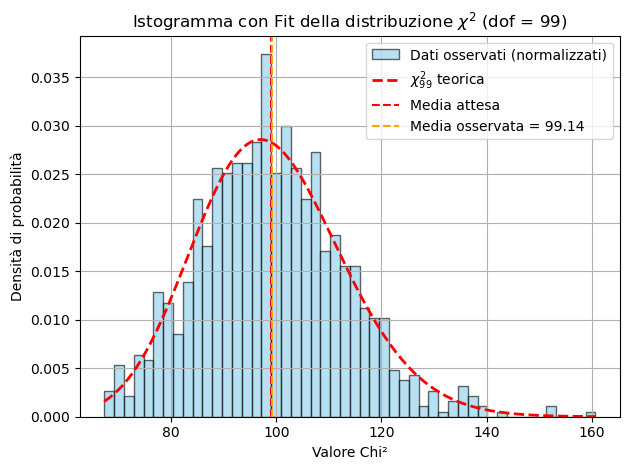

In [5]:

from scipy.stats import kstest
df = pd.read_csv("data/risultati_1_1_3_1000values.out")
chi2_values = df["Chi2_value"]

# Parametri
dof = 99  # gradi di libertà
bins = 50
expected_mean = dof
observed_mean = chi2_values.mean()

# Istogramma dei dati osservati
counts, bin_edges, _ = plt.hist(
    chi2_values,
    bins=bins,
    density=True,  # Normalizza l'istogramma per il confronto con la pdf teorica
    color='skyblue',
    edgecolor='black',
    alpha=0.6,
    label='Dati osservati (normalizzati)'
)

# Calcolo della curva teorica
x_fit = np.linspace(min(chi2_values), max(chi2_values), 1000)
pdf_fit = chi2.pdf(x_fit, df=dof)

# Plot della curva teorica
plt.plot(x_fit, pdf_fit, 'r--', linewidth=2, label=f'$\chi^2_{{{dof}}}$ teorica')

# Linee per la media attesa e osservata
plt.axvline(expected_mean, color='red', linestyle='--', linewidth=1.5, label='Media attesa')
plt.axvline(observed_mean, color='orange', linestyle='--', linewidth=1.5, label=f'Media osservata = {observed_mean:.2f}')

# Etichette e stile
plt.title(f"Istogramma con Fit della distribuzione $\chi^2$ (dof = {dof})")
plt.xlabel("Valore Chi²")
plt.ylabel("Densità di probabilità")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
from scipy.stats import kstest

ks_stat, p_value = kstest(chi2_values, 'chi2', args=(dof,))

print(f"P-value: {p_value:.4f}")


P-value: 0.8852


Notiamo dall'istogramma che aumentando il numero di valutazioni del $\chi^2$ fino a 1000 diverse valutazioni, la distribuzione si avvicina a quella di $\chi^2$ in maniera molto più aderente a quella teorica. Il valore del p-value > 0.05 permette di rigettare l'ipotesi nulla, che l'aderenza tra curva teorica e curva empirica sia dovuta ad una fluttuzione statistica.

## **Exercise 01.2**
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a **generic** exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

## Soluzione:


**Il teorema del limite Centrale afferma che**


Siano $$ X_1, X_2, \dots, X_n $$ **variabili casuali indipendenti e identicamente distribuite (i.i.d.)** con:

- media finita $$ \mu = \mathbb{E}[X_i] $$
- varianza finita $$ \sigma^2 = \mathrm{Var}(X_i) $$

Definiamo la **media campionaria**:


$$\bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i$$


Allora la **variabile normalizzata**:

$$
Z_n = \frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}}
$$

converge in distribuzione a una **normale standard**:

$$
Z_n \xrightarrow{d} \mathcal{N}(0, 1) \quad \text{quando} \quad n \to \infty
$$


#### VALORI GENERATI CON UNA DISTRIBUZIONE UNIFORME TRA [0,1) 

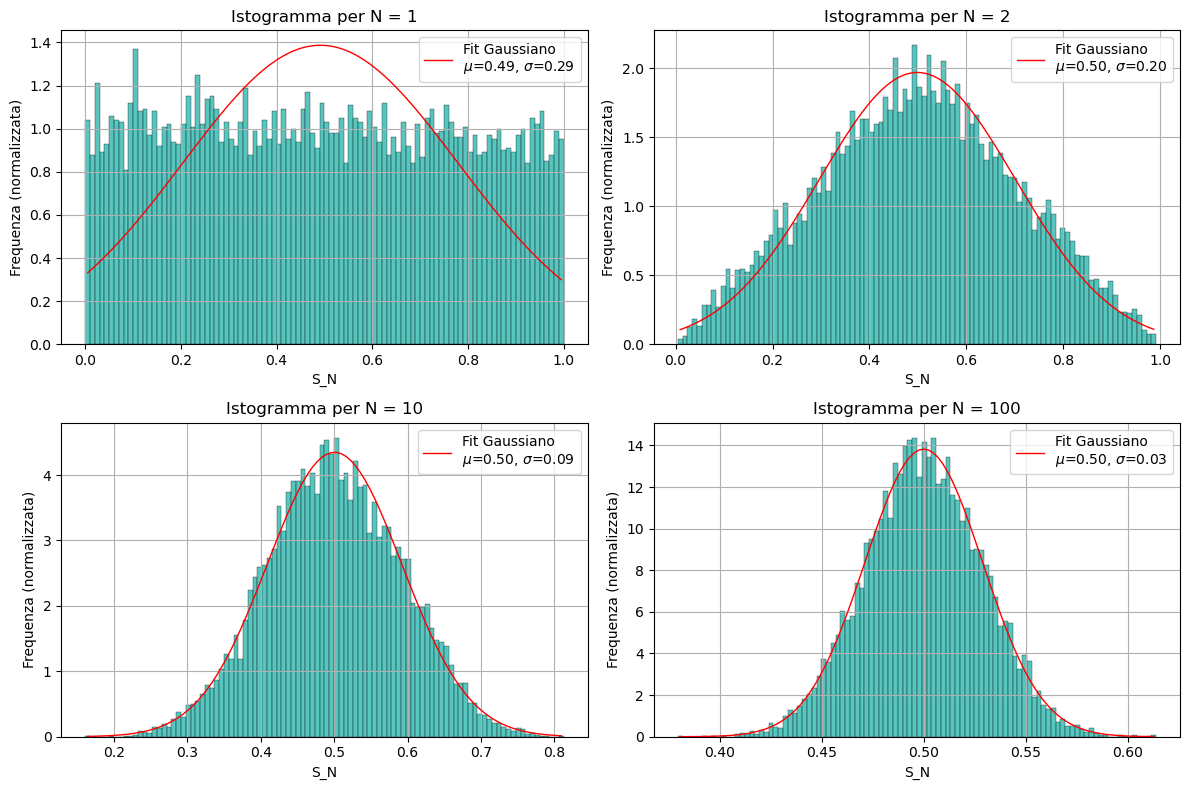

In [7]:


# Carica i dati
df_std = pd.read_csv("data/standard.csv")

# Ottieni i valori unici di 'sums length' (es. 1, 2, 10, 100)
unique_lengths = sorted(df_std["N"].unique())

# Crea un istogramma per ogni valore di N
plt.figure(figsize=(12, 8))

bins = 100
#range_x = (-20, 20)

for i, N in enumerate(unique_lengths):
    plt.subplot(2, 2, i + 1)  # Adatta se hai più o meno di 4 istogrammi
    subset1 = df_std[(df_std["N"] == N)]["value"]
    hist_vals, bin_edges = np.histogram(subset1, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Fit Gaussiano
    mu, sigma = norm.fit(subset1)
    

    plt.hist(subset1, bins=100,  alpha=0.75, color="lightseagreen", edgecolor='black', linewidth= 0.3, density=True)
    #x = np.linspace(range_x[0], range_x[1], 1000)
    plt.plot(bin_centers, norm.pdf(bin_centers, mu, sigma), 'r-', lw=1, label=f'Fit Gaussiano\n$\mu$={mu:.2f}, $\sigma$={sigma:.2f}')

    plt.title(f"Istogramma per N = {N}")
    plt.xlabel("S_N")
    plt.ylabel("Frequenza (normalizzata)")
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

#### VALORI GENERATI CON UNA DISTRIBUZIONE ESPONENZIALE CON $\lambda=1$

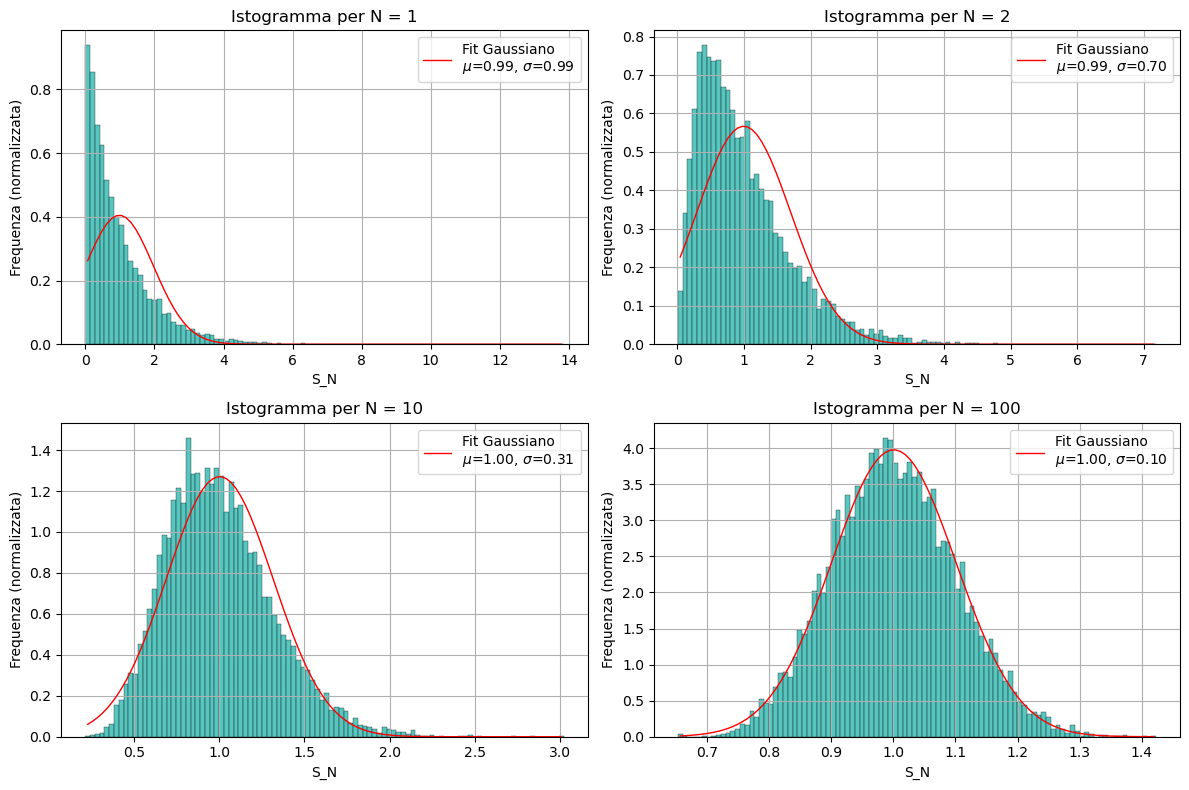

In [8]:


# Carica i dati
df_exp = pd.read_csv("data/exponential.csv")

# Ottieni i valori unici di 'sums length' (es. 1, 2, 10, 100)
unique_lengths = sorted(df_exp["N"].unique())

# Crea un istogramma per ogni valore di N
plt.figure(figsize=(12, 8))

bins = 100
#range_x = (-20, 20)

for i, N in enumerate(unique_lengths):
    plt.subplot(2, 2, i + 1)  # Adatta se hai più o meno di 4 istogrammi
    subset2 =df_exp[(df_exp["N"] == N)]["value"]
    hist_vals, bin_edges = np.histogram(subset2, bins=bins, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Fit Gaussiano
    mu, sigma = norm.fit(subset2)
    

    plt.hist(subset2, bins=100,  alpha=0.75, color="lightseagreen", edgecolor='black', linewidth= 0.3, density=True)
    #x = np.linspace(range_x[0], range_x[1], 1000)
    plt.plot(bin_centers, norm.pdf(bin_centers, mu, sigma), 'r-', lw=1, label=f'Fit Gaussiano\n$\mu$={mu:.2f}, $\sigma$={sigma:.2f}')

    plt.title(f"Istogramma per N = {N}")
    plt.xlabel("S_N")
    plt.ylabel("Frequenza (normalizzata)")
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

#### VALORI GENERATI SECONDO LA DISTRIBUZIONE DI CAUCHY-LORENTZ CON $\mu=0$ and $\Gamma=1$

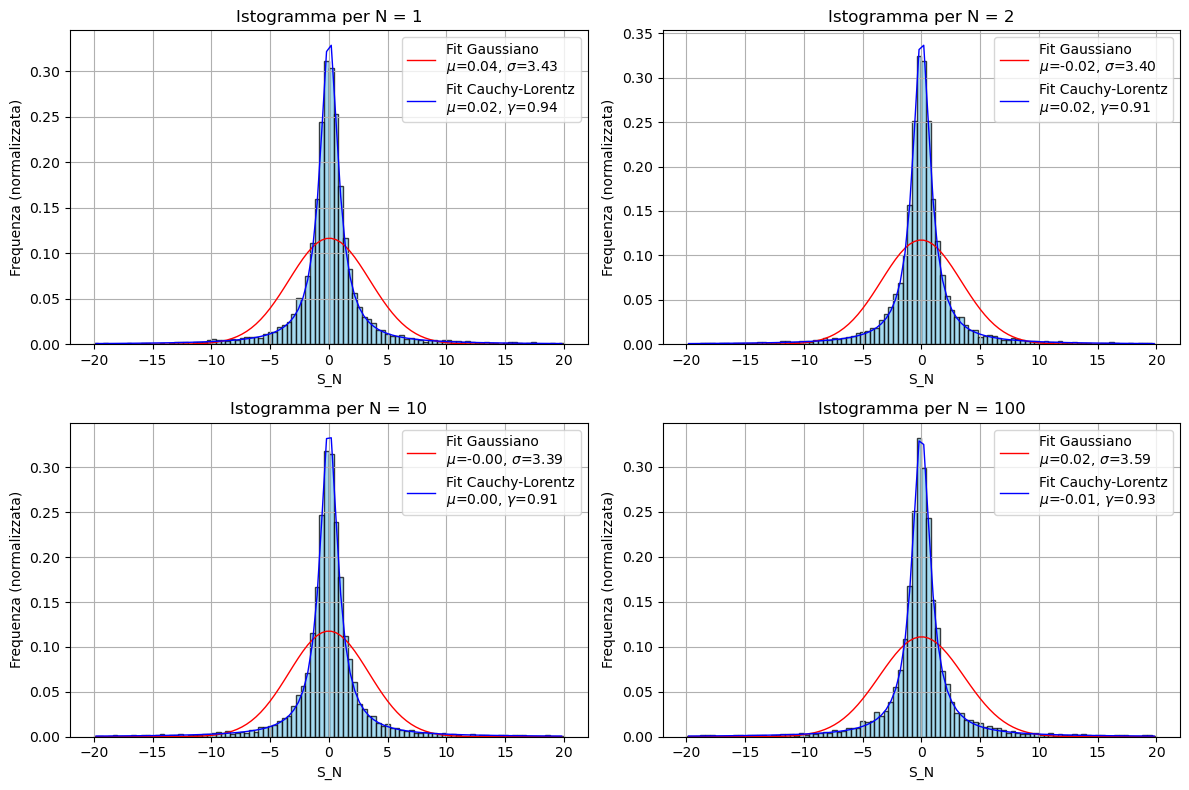

In [9]:


# Carica i dati
df_cau = pd.read_csv("data/cauchylorentz.csv")

# Ottieni i valori unici di 'sums length' (es. 1, 2, 10, 100)
unique_lengths = sorted(df_cau["N"].unique())

# Crea un istogramma per ogni valore di N
plt.figure(figsize=(12, 8))

bins = 100
range_x = (-20, 20)

for i, N in enumerate(unique_lengths):
    plt.subplot(2, 2, i + 1)  # Adatta se hai più o meno di 4 istogrammi
    subset = df_cau[(df_cau["N"] == N) & (df_cau["value"]<range_x[1]) & (df_cau["value"]>range_x[0])]["value"]
    hist_vals, bin_edges = np.histogram(subset, bins=bins, density=True, range=range_x)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Fit Gaussiano
    mu, sigma = norm.fit(subset)
    # Fit Cauchy-Lorentz
    loc, scale = cauchy.fit(subset)

    plt.hist(subset, bins=100, range =range_x , alpha=0.75, color="skyblue", edgecolor='black', density=True)
    #x = np.linspace(range_x[0], range_x[1], 1000)
    plt.plot(bin_centers, norm.pdf(bin_centers, mu, sigma), 'r-', lw=1, label=f'Fit Gaussiano\n$\mu$={mu:.2f}, $\sigma$={sigma:.2f}')
    plt.plot(bin_centers, cauchy.pdf(bin_centers, loc, scale), 'b-', lw=1, label=f'Fit Cauchy-Lorentz\n$\mu$={loc:.2f}, $\gamma$={scale:.2f}')

    plt.title(f"Istogramma per N = {N}")
    plt.xlabel("S_N")
    plt.ylabel("Frequenza (normalizzata)")
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

#### COMMENTO
Possiamo notare che, come ci aspettavamo, sia la distribuzione uniforme che quella esponenziale rispettano il Teorema del Limite Centrale, mostrando un buon accordo tra i dati e i fit gaussiani. Nel caso della distribuzione di Cauchy-Lorentz, invece, è necessario adattare l'istogramma con una distribuzione lorentziana, poiché il fit gaussiano non è adeguato. Infatti la distribuzione di Cauchy-Lorentz, non avendo varianza finita, non rispetta le ipotesi del teorema del limite centrale. Per quest'ultima distribuzione esiste una versione generalizzata del Teorema del Limite centrale che afferma la convergenza di questa distribuzione empirica alla distribuzione di Cauchy-Lorentz.

## **Exercise 01.3**
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

## Soluzione:
Per simulare l'esperimento di Buffon ho immaginato di avere un piano bidimensionale su cui fossero poste linee verticali a distanza $d= 1.2$, e che l'ago da far cadere sopra di esse fosse di lunghezza L=1. 
Ho ottenuto il valore approssimato di $\pi \simeq 3.14245 $ con errore $\sigma = 0.0033$

Riporto sotto il grafico che mostra l'andamento della misura e dell'errore in funzione del numero di blocchi utilizzando sempre la tecnica del Data Blocking.

Riporto la funzione utilizzata per simulare una serie di presa dati dell'esperimento di Buffon

```cpp
double Eval(double L , double d, int dim, Random &rnd ) {
    
    int n_hit=0, n_tot=0;
    
    for(int i=0; i<dim; i++){
        double X1 = rnd.Rannyu(0,d); // suppongo le stanghette siano verticali sul piano, distanziate d lungo asse x

        double x_dir = rnd.Rannyu(-1,1);
        double y_dir = rnd.Rannyu(-1,1);
        double r = sqrt(x_dir*x_dir + y_dir*y_dir);

        double X2 = X1 + ( L* x_dir/r ); // voglio vedere dove cade la componente x del secondo punto, se cade oltre zero o oltre d allora ha colpito la stanghetta
        if (r < 1) {
            if( (X2 <=0) || (X2>=d) || (X1==0) ) n_hit ++;

            n_tot ++;
        }
    }
    double val= (2*L*n_tot) / (n_hit * d);

    return val;
}

## Parametri:


- numero di blocchi: 100

- numero di valutazioni per blocco: 10000

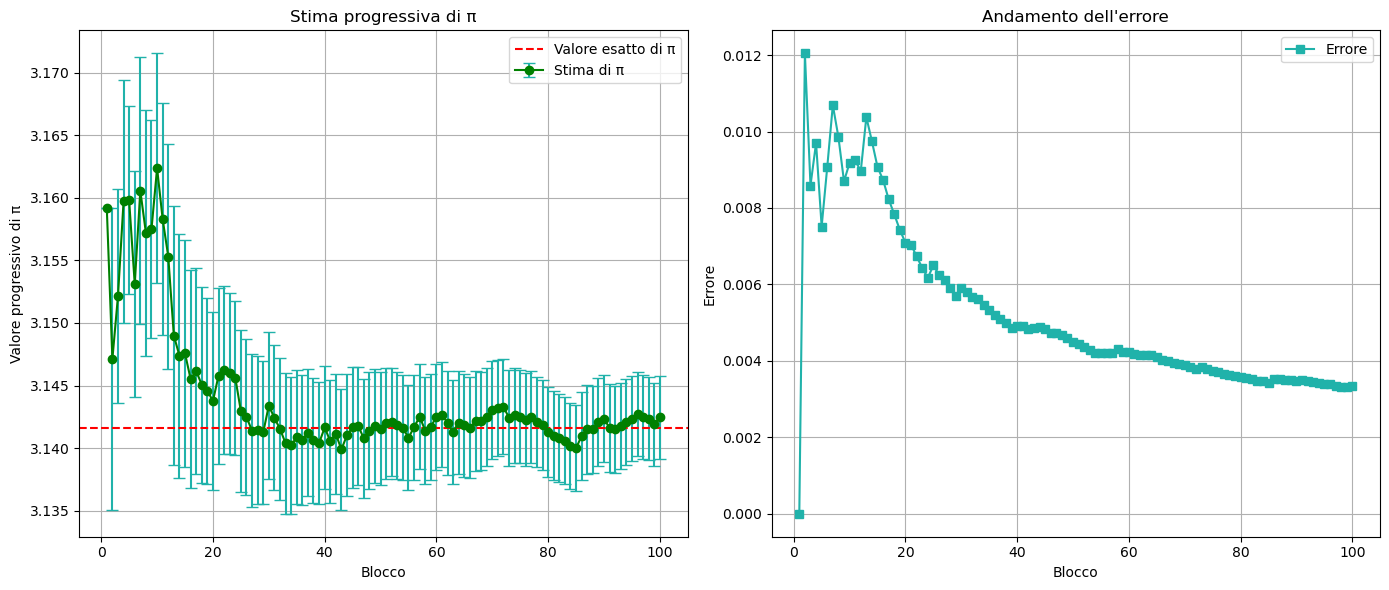

In [10]:
df = pd.read_csv("data/risultati_1_3.out")  # Cambia con il nome reale del file

x = df["Block"]
y = df["Progressive_val"]
yerr = df["Error"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot stima di π
axes[0].errorbar(x, y, yerr=yerr, fmt='o-', capsize=4, label='Stima di π', ecolor= 'lightseagreen' , color='green')
axes[0].axhline(y=3.14159, color='r', linestyle='--', label='Valore esatto di π',)
axes[0].set_xlabel("Blocco")
axes[0].set_ylabel("Valore progressivo di π")
axes[0].set_title("Stima progressiva di π")
axes[0].grid(True)
axes[0].legend()

# Plot errore
axes[1].plot(x, yerr, 's-', color='lightseagreen', label='Errore')
axes[1].set_xlabel("Blocco")
axes[1].set_ylabel("Errore")
axes[1].set_title("Andamento dell'errore")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

Noto che il risultato ottenuto è compatibile con il valore esatto di $\pi$ e l'errore decresce in funzione dei blocchi seguenza la solita power-law.